In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('./zhengqi_train.txt', sep='\t')
test_data = pd.read_csv('./zhengqi_test.txt', sep='\t')

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2888 entries, 0 to 2887
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      2888 non-null   float64
 1   V1      2888 non-null   float64
 2   V2      2888 non-null   float64
 3   V3      2888 non-null   float64
 4   V4      2888 non-null   float64
 5   V5      2888 non-null   float64
 6   V6      2888 non-null   float64
 7   V7      2888 non-null   float64
 8   V8      2888 non-null   float64
 9   V9      2888 non-null   float64
 10  V10     2888 non-null   float64
 11  V11     2888 non-null   float64
 12  V12     2888 non-null   float64
 13  V13     2888 non-null   float64
 14  V14     2888 non-null   float64
 15  V15     2888 non-null   float64
 16  V16     2888 non-null   float64
 17  V17     2888 non-null   float64
 18  V18     2888 non-null   float64
 19  V19     2888 non-null   float64
 20  V20     2888 non-null   float64
 21  V21     2888 non-null   float64
 22  

In [4]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V0      1925 non-null   float64
 1   V1      1925 non-null   float64
 2   V2      1925 non-null   float64
 3   V3      1925 non-null   float64
 4   V4      1925 non-null   float64
 5   V5      1925 non-null   float64
 6   V6      1925 non-null   float64
 7   V7      1925 non-null   float64
 8   V8      1925 non-null   float64
 9   V9      1925 non-null   float64
 10  V10     1925 non-null   float64
 11  V11     1925 non-null   float64
 12  V12     1925 non-null   float64
 13  V13     1925 non-null   float64
 14  V14     1925 non-null   float64
 15  V15     1925 non-null   float64
 16  V16     1925 non-null   float64
 17  V17     1925 non-null   float64
 18  V18     1925 non-null   float64
 19  V19     1925 non-null   float64
 20  V20     1925 non-null   float64
 21  V21     1925 non-null   float64
 22  

箱形图查看异常点

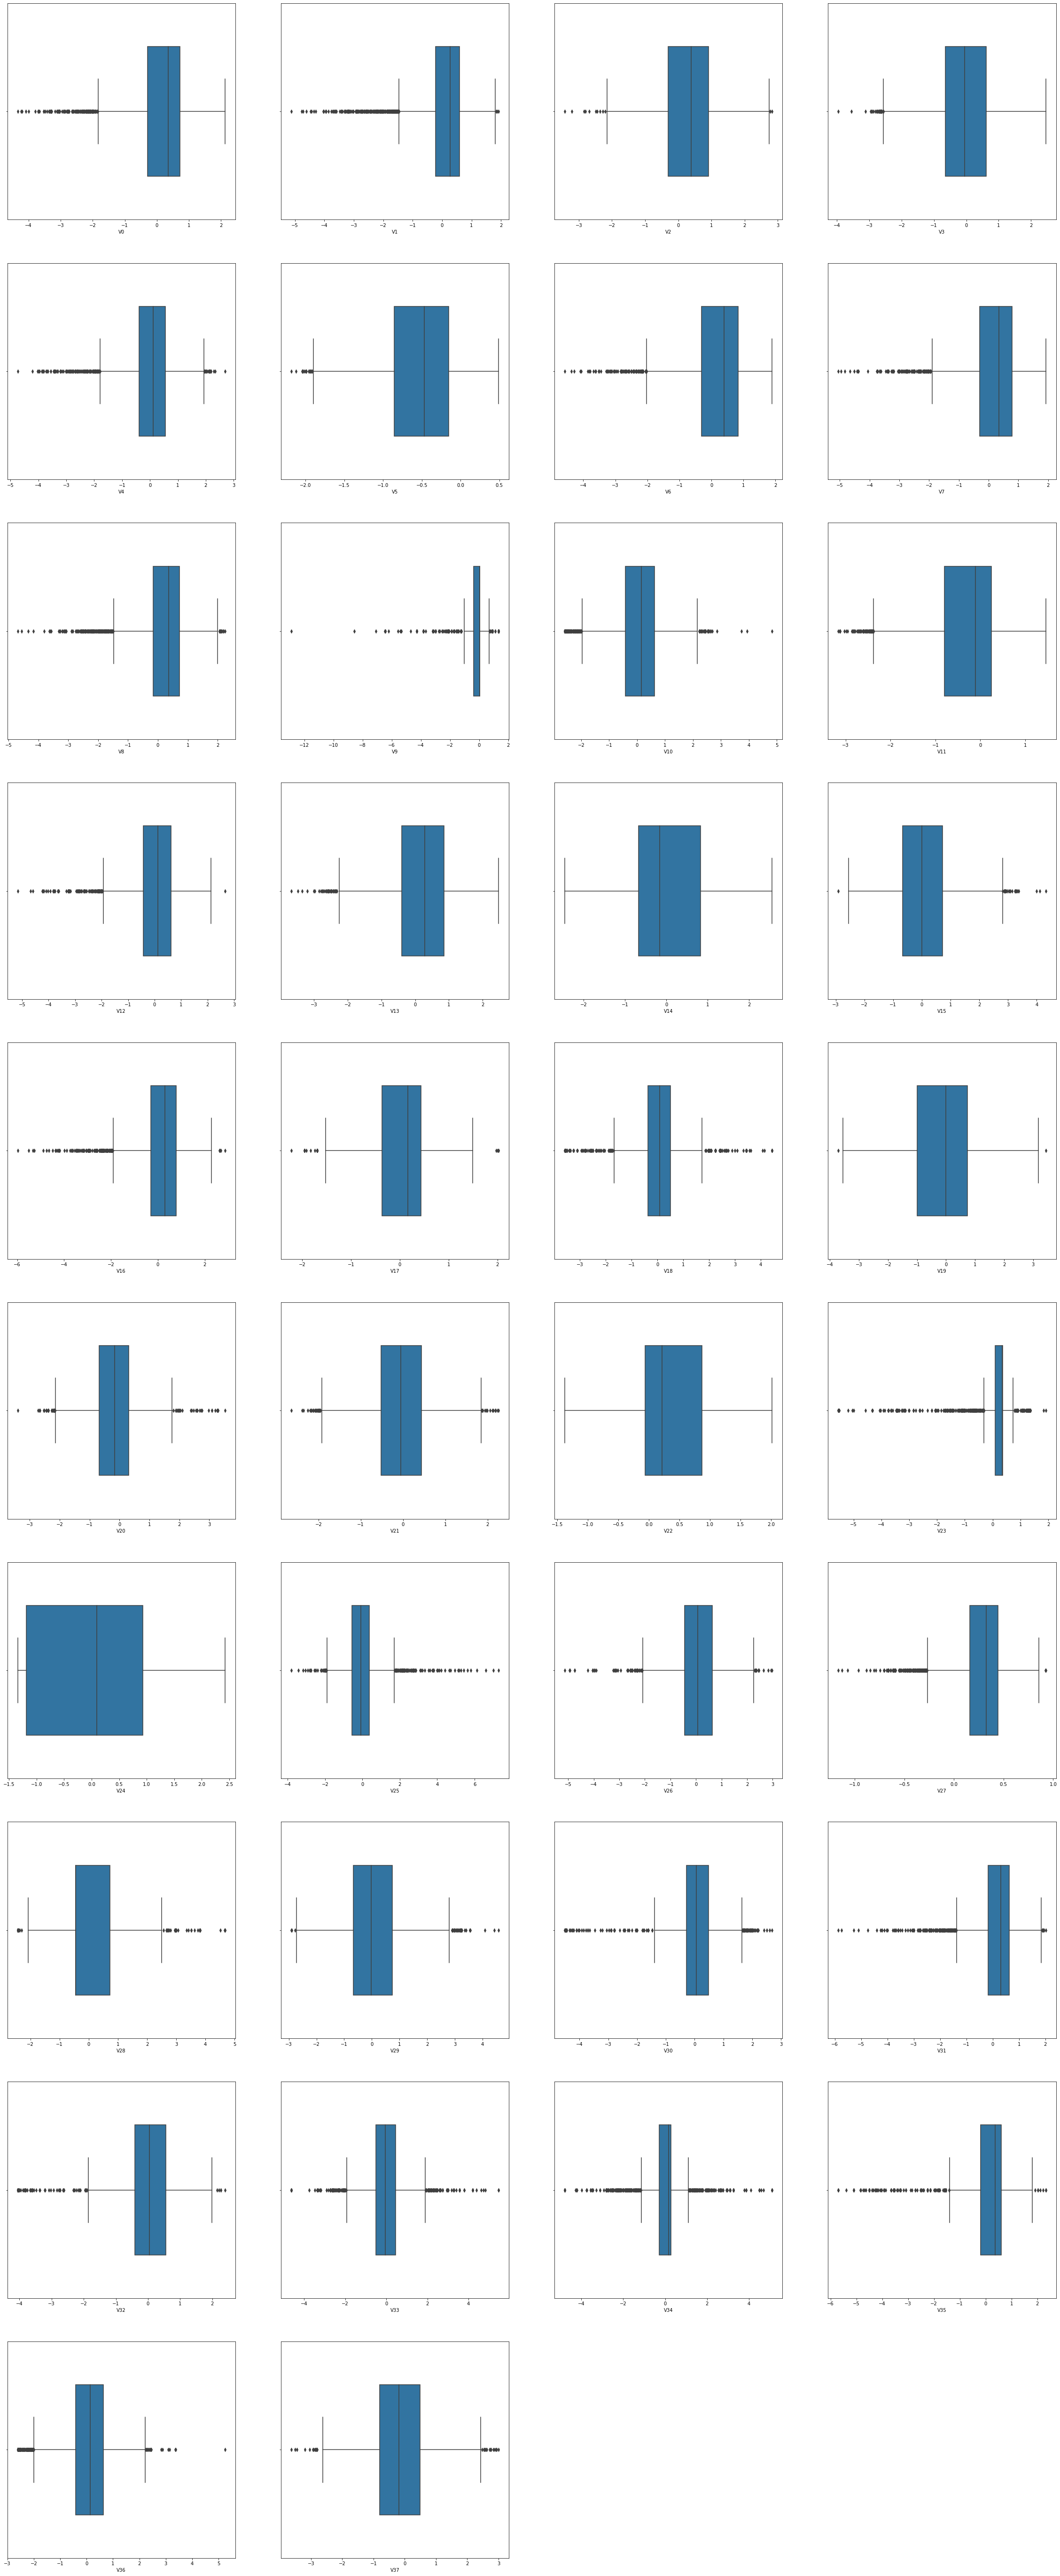

In [5]:
fig = plt.figure(figsize=(40,100))
for i in range(38):
    plt.subplot(10,4,i+1)
    sns.boxplot(train_data[f'V{i}'], width=0.6)

查看测试数据与训练数据的分布情况

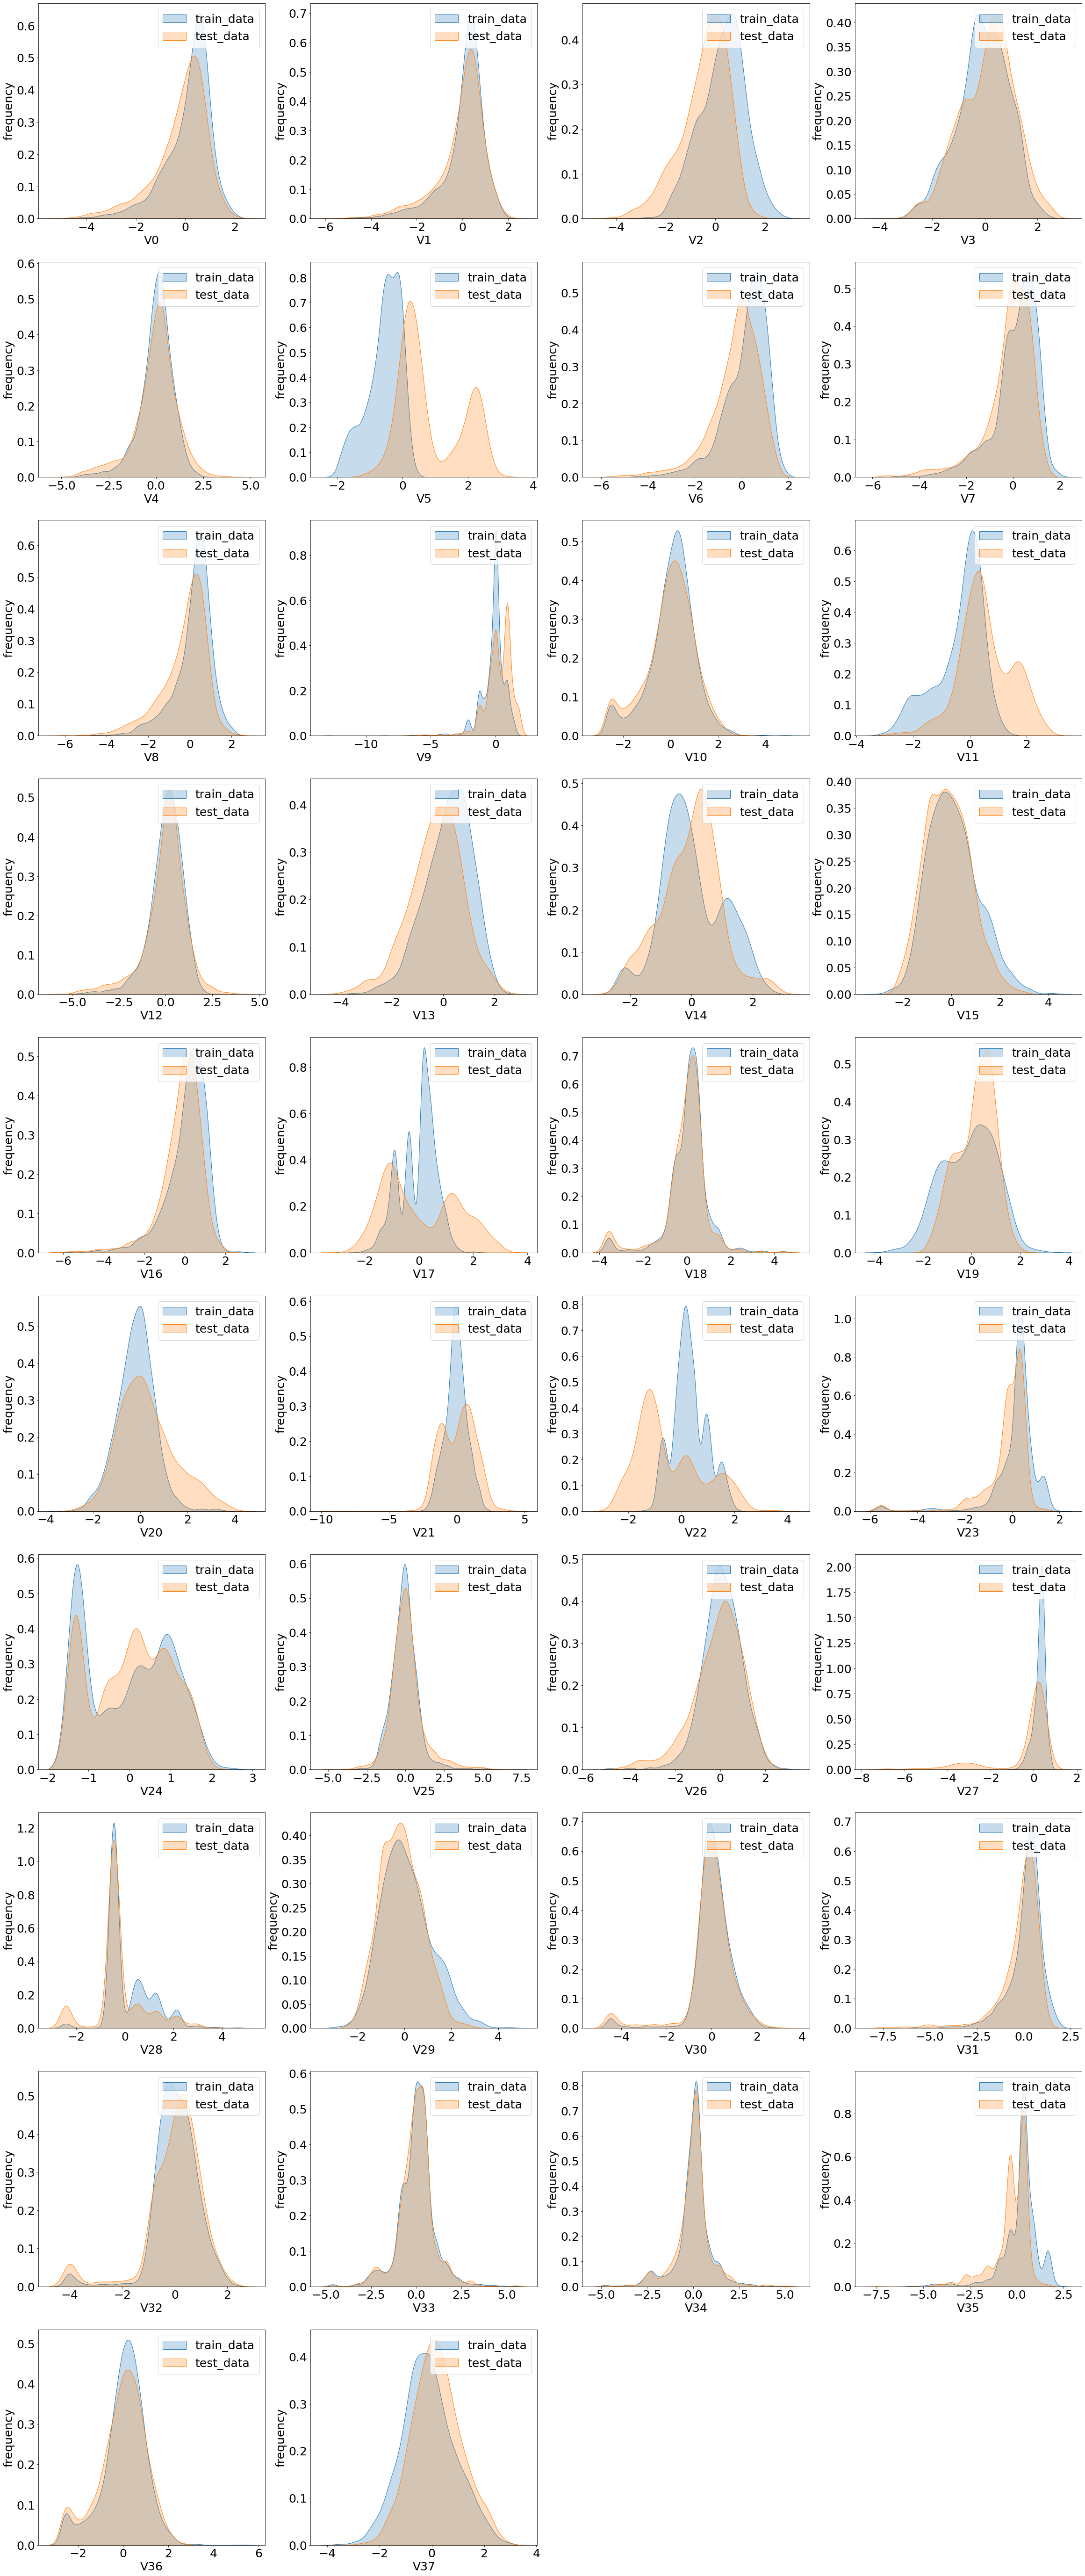

In [6]:
fig2 = plt.figure(figsize=(40,100))
for i in range(38):
    plt.subplot(10,4,i+1)
    ax = sns.kdeplot(train_data[f'V{i}'], shade=True)
    ax = sns.kdeplot(test_data[f'V{i}'], shade=True)
    ax.set_ylabel('frequency',fontsize=25)
    ax.set_xlabel(f'V{i}',fontsize=25)
    ax.legend(['train_data','test_data'],fontsize = 25)
    plt.tick_params(labelsize = 25)


去除分布差距过大的数据

In [7]:
drop_col = ['V5','V14','V17','V21','V22']
train_data.drop(drop_col,axis=1, inplace=True)
test_data.drop(drop_col,axis=1, inplace=True)
train_data_corr = train_data.corr()
train_data_corr

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
V0,1.000000,0.908607,0.463643,0.409576,0.781212,0.189267,0.141294,0.794013,0.077888,0.298443,...,0.302145,0.156968,0.675003,0.050951,0.056439,-0.019342,0.138933,0.231417,-0.494076,0.873212
V1,0.908607,1.000000,0.506514,0.383924,0.657790,0.276805,0.205023,0.874650,0.138849,0.310120,...,0.147096,0.175997,0.769745,0.085604,0.035129,-0.029115,0.146329,0.235299,-0.494043,0.871846
V2,0.463643,0.506514,1.000000,0.410148,0.057697,0.615938,0.477114,0.703431,0.047874,0.346006,...,-0.275764,0.175943,0.653764,0.033942,0.050309,-0.025620,0.043648,0.316462,-0.734956,0.638878
V3,0.409576,0.383924,0.410148,1.000000,0.315046,0.233896,0.197836,0.411946,-0.063717,0.321262,...,0.117610,0.043966,0.421954,-0.092423,-0.007159,-0.031898,0.080034,0.324475,-0.229613,0.512074
V4,0.781212,0.657790,0.057697,0.315046,1.000000,-0.117529,-0.052370,0.449542,-0.031816,0.141129,...,0.659093,0.022807,0.447016,-0.026186,0.062367,0.028659,0.100010,0.113609,-0.031054,0.603984
V6,0.189267,0.276805,0.615938,0.233896,-0.117529,1.000000,0.917502,0.468233,0.450096,0.415660,...,-0.467980,0.188907,0.546535,0.144550,0.054210,-0.002914,0.044992,0.433804,-0.404817,0.370037
V7,0.141294,0.205023,0.477114,0.197836,-0.052370,0.917502,1.000000,0.389987,0.446611,0.310982,...,-0.311363,0.170113,0.475254,0.122707,0.034508,-0.019103,0.111166,0.340479,-0.292285,0.287815
V8,0.794013,0.874650,0.703431,0.411946,0.449542,0.468233,0.389987,1.000000,0.100672,0.419703,...,-0.011091,0.150258,0.878072,0.038430,0.026843,-0.036297,0.179167,0.326586,-0.553121,0.831904
V9,0.077888,0.138849,0.047874,-0.063717,-0.031816,0.450096,0.446611,0.100672,1.000000,0.120208,...,-0.221623,0.293026,0.121712,0.289891,0.115655,0.094856,0.141703,0.129542,-0.112503,0.139704
V10,0.298443,0.310120,0.346006,0.321262,0.141129,0.415660,0.310982,0.419703,0.120208,1.000000,...,-0.105042,-0.036705,0.560213,-0.093213,0.016739,-0.026994,0.026846,0.922190,-0.045851,0.394767


画热力图，查看数据与目标值的相关系数

<AxesSubplot:>

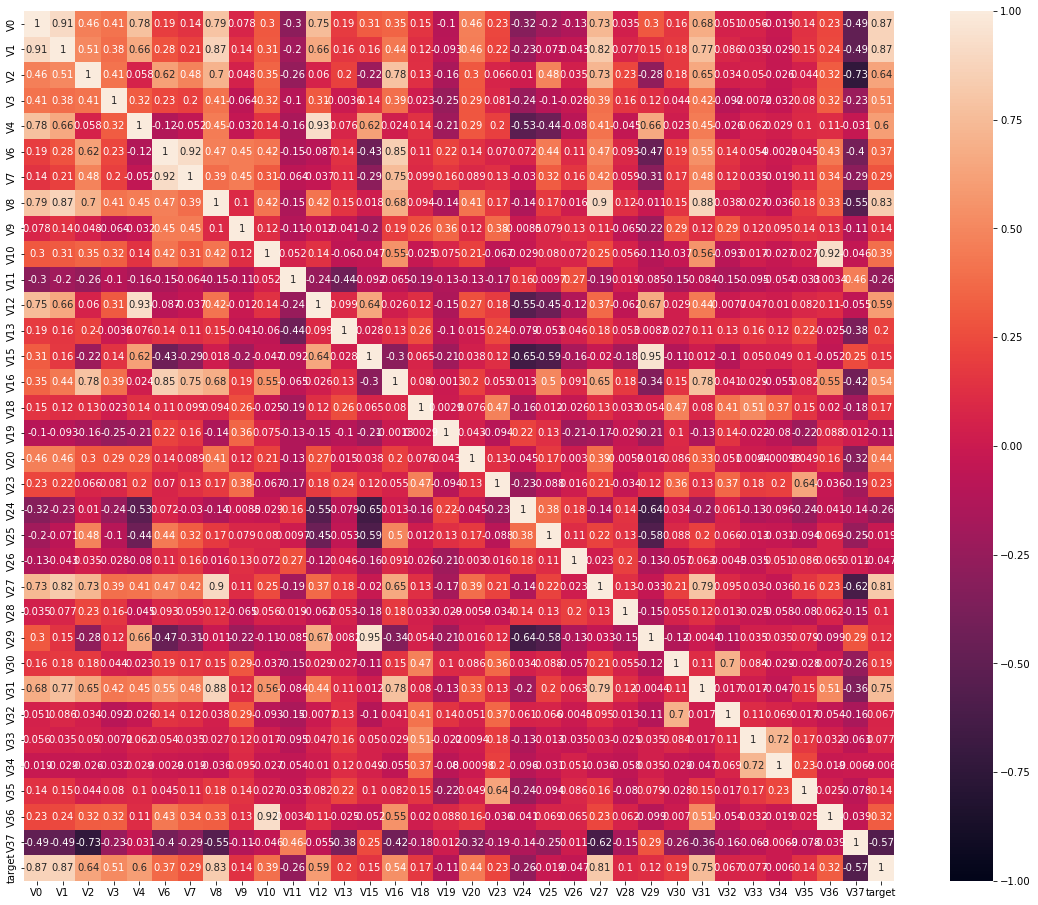

In [8]:
ax = plt.figure(figsize=(20,16))
sns.heatmap(train_data_corr,vmax=1, vmin=-1, square=True, annot=True)

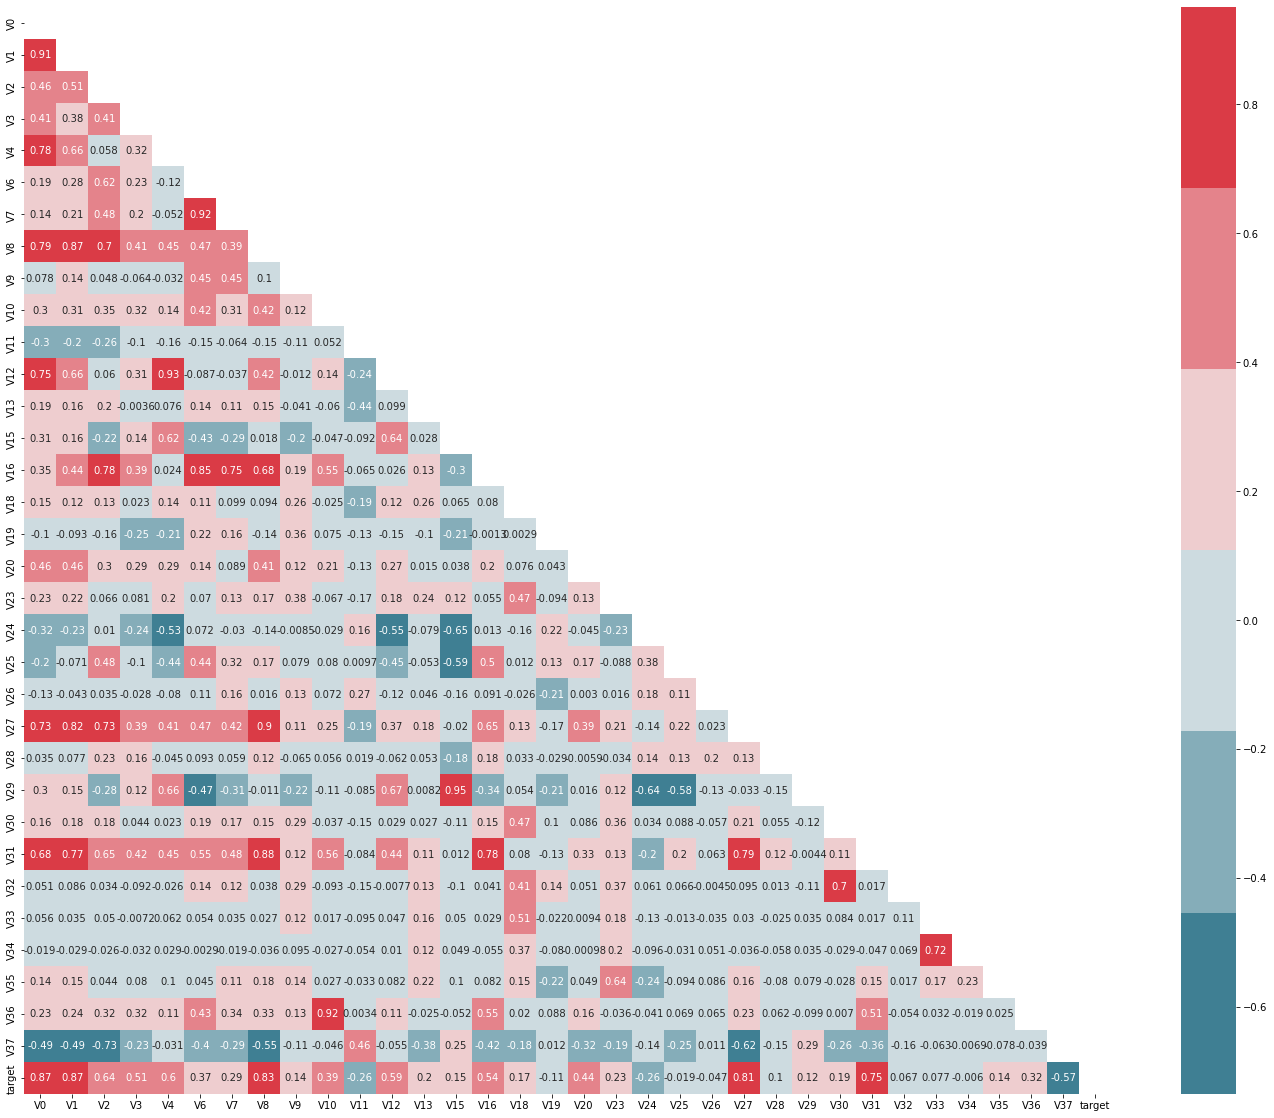

In [9]:
plt.figure(figsize=(25,20))
colmn = train_data.columns.tolist()
mcorr = train_data.corr()
mask = np.zeros_like(mcorr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220,10)
ax = sns.heatmap(mcorr,mask=mask,cmap=cmap,square=True, annot= True)

In [10]:
cond = mcorr['target'].abs()<=0.1
drop_col = mcorr.index[cond]
train_data.drop(drop_col,axis=1,inplace=True)
test_data.drop(drop_col,axis=1,inplace=True)

In [11]:
display(train_data.head())

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V24,V27,V28,V29,V30,V31,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-2.114,-0.940,...,0.800,0.168,-0.450,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,-2.114,0.188,...,0.801,0.338,0.671,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,-2.114,0.874,...,0.961,0.326,1.287,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,-2.114,0.011,...,1.435,0.277,1.298,0.015,0.417,0.279,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-2.114,-0.251,...,0.881,0.332,1.289,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384


将训练数据以及测试数据分标签合并，统一保存

In [12]:
train_data['label'] = 'train'
test_data['label'] = 'test'
data = pd.concat([train_data,test_data],axis=0)

In [13]:
data

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V27,V28,V29,V30,V31,V35,V36,V37,target,label
0,0.566,0.016,-0.143,0.407,0.452,-1.812,-2.360,-0.436,-2.114,-0.940,...,0.168,-0.450,0.136,0.109,-0.615,-5.101,-2.608,-3.508,0.175,train
1,0.968,0.437,0.066,0.566,0.194,-1.566,-2.360,0.332,-2.114,0.188,...,0.338,0.671,-0.128,0.124,0.032,0.364,-0.335,-0.730,0.676,train
2,1.013,0.568,0.235,0.370,0.112,-1.367,-2.360,0.396,-2.114,0.874,...,0.326,1.287,-0.009,0.361,0.277,0.364,0.765,-0.589,0.633,train
3,0.733,0.368,0.283,0.165,0.599,-1.200,-2.086,0.403,-2.114,0.011,...,0.277,1.298,0.015,0.417,0.279,0.364,0.333,-0.112,0.206,train
4,0.684,0.638,0.260,0.209,0.337,-1.073,-2.086,0.314,-2.114,-0.251,...,0.332,1.289,0.183,1.078,0.328,0.364,-0.280,-0.028,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,-1.362,-1.553,-3.096,-0.444,0.381,-4.854,-5.331,-4.074,-3.838,-2.551,...,-1.674,0.525,0.171,-4.488,-5.793,-2.131,-2.564,0.597,NaN,test
1921,-2.698,-3.452,-3.620,-1.066,-1.385,-4.927,-5.103,-4.393,-1.683,-2.525,...,-1.773,-0.446,1.297,-0.613,-7.698,-2.131,-2.564,1.215,NaN,test
1922,-2.615,-3.564,-3.402,-0.422,-1.272,-4.223,-4.315,-5.196,-3.407,-2.529,...,-1.585,-0.447,0.552,0.125,-6.111,-1.537,-2.544,1.612,NaN,test
1923,-2.661,-3.646,-3.271,-0.699,-1.270,-3.716,-3.809,-4.735,-2.976,-2.560,...,-1.410,-0.447,0.318,1.086,-5.268,-1.537,-2.549,1.431,NaN,test


In [14]:
data.to_csv('./合体数据', index=False)

In [15]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

数据归一化处理

In [16]:
mm = MinMaxScaler()
standarscaler = StandardScaler()
columns = data.columns.to_list()
data[columns[:-2]] = mm.fit_transform(data[columns[:-2]])

In [17]:
data

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V27,V28,V29,V30,V31,V35,V36,V37,target,label
0,0.775775,0.723449,0.582197,0.665193,0.571839,0.508616,0.432852,0.664108,0.735280,0.221743,...,0.902936,0.279341,0.406834,0.603714,0.729379,0.242424,0.000000,0.018343,0.175,train
1,0.833742,0.778785,0.611588,0.689434,0.544381,0.541225,0.432852,0.754813,0.735280,0.373887,...,0.924734,0.437095,0.371596,0.605676,0.796005,0.800020,0.289702,0.436025,0.676,train
2,0.840231,0.796004,0.635354,0.659552,0.535653,0.567603,0.432852,0.762372,0.735280,0.466415,...,0.923195,0.523783,0.387480,0.636673,0.821234,0.800020,0.429901,0.457224,0.633,train
3,0.799856,0.769716,0.642104,0.628297,0.587484,0.589740,0.469177,0.763198,0.735280,0.350013,...,0.916912,0.525331,0.390683,0.643997,0.821440,0.800020,0.374841,0.528943,0.206,train
4,0.792790,0.805205,0.638869,0.635005,0.559600,0.606575,0.469177,0.752687,0.735280,0.314675,...,0.923965,0.524064,0.413107,0.730447,0.826485,0.800020,0.296712,0.541573,0.384,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.497765,0.517219,0.166924,0.535447,0.564283,0.105382,0.038977,0.234440,0.617657,0.004451,...,0.666752,0.416549,0.411506,0.002485,0.196169,0.545455,0.005608,0.635544,NaN,test
1921,0.305119,0.267613,0.093236,0.440616,0.376330,0.095705,0.069203,0.196764,0.764686,0.007958,...,0.654058,0.279904,0.561799,0.509286,0.000000,0.545455,0.005608,0.728462,NaN,test
1922,0.317087,0.252892,0.123893,0.538802,0.388357,0.189024,0.173671,0.101925,0.647063,0.007418,...,0.678164,0.279764,0.462360,0.605807,0.163423,0.606061,0.008157,0.788152,NaN,test
1923,0.310454,0.242114,0.142315,0.496570,0.388570,0.256230,0.240753,0.156372,0.676469,0.003237,...,0.700603,0.279764,0.431127,0.731494,0.250232,0.606061,0.007520,0.760938,NaN,test


In [18]:
cond = data['label'] == 'train'
train_data = data[cond].iloc[:,:-1]
train_data

,V0,V1,V2,V3,V4,V6,V7,V8,V9,V10,...,V24,V27,V28,V29,V30,V31,V35,V36,V37,target
0,0.775775,0.723449,0.582197,0.665193,0.571839,0.508616,0.432852,0.664108,0.735280,0.221743,...,0.569153,0.902936,0.279341,0.406834,0.603714,0.729379,0.242424,0.000000,0.018343,0.175
1,0.833742,0.778785,0.611588,0.689434,0.544381,0.541225,0.432852,0.754813,0.735280,0.373887,...,0.569419,0.924734,0.437095,0.371596,0.605676,0.796005,0.800020,0.289702,0.436025,0.676
2,0.840231,0.796004,0.635354,0.659552,0.535653,0.567603,0.432852,0.762372,0.735280,0.466415,...,0.611893,0.923195,0.523783,0.387480,0.636673,0.821234,0.800020,0.429901,0.457224,0.633
3,0.799856,0.769716,0.642104,0.628297,0.587484,0.589740,0.469177,0.763198,0.735280,0.350013,...,0.737722,0.916912,0.525331,0.390683,0.643997,0.821440,0.800020,0.374841,0.528943,0.206
4,0.792790,0.805205,0.638869,0.635005,0.559600,0.606575,0.469177,0.752687,0.735280,0.314675,...,0.590656,0.923965,0.524064,0.413107,0.730447,0.826485,0.800020,0.296712,0.541573,0.384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2883,0.721557,0.718060,0.582900,0.627687,0.587590,0.849152,0.823147,0.712531,0.941189,0.396412,...,0.009026,0.905629,0.279482,0.405766,0.562255,0.876017,0.727273,0.405812,0.648925,0.235
2884,0.767267,0.794558,0.643932,0.631041,0.580140,0.848091,0.823147,0.779024,0.941189,0.340302,...,0.007964,0.929093,0.280889,0.427523,0.551923,0.840593,0.727273,0.254015,0.488648,1.042
2885,0.637347,0.626577,0.534102,0.615948,0.538208,0.835631,0.827124,0.618991,0.941189,0.380901,...,0.009026,0.888832,0.280045,0.427523,0.566048,0.820307,0.727273,0.453607,0.658247,0.005
2886,0.662581,0.684280,0.553931,0.595670,0.571520,0.823038,0.823015,0.645211,0.941189,0.295252,...,0.008229,0.898449,0.279623,0.417512,0.728224,0.787458,0.739414,0.294035,0.629229,0.350


查看数据的正态分布情况

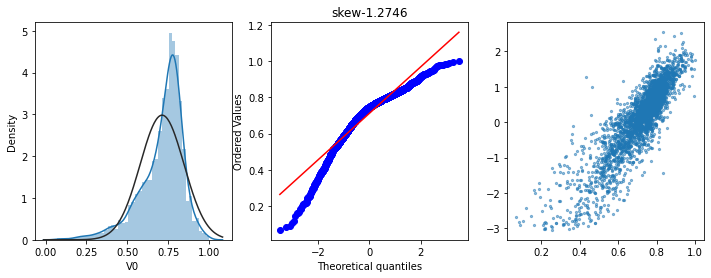

In [19]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.distplot(train_data['V0'],fit=stats.norm)
ax = plt.subplot(132)
stats.probplot(train_data['V0'], plot = ax)
plt.title('skew'+'{:.4f}'.format(stats.skew(train_data['V0'])))
plt.subplot(133)
plt.scatter(train_data['V0'],train_data['target'],s=5, alpha=0.5)